# _h_-means

Heuristic clustering inspired by [_k_-means](https://en.wikipedia.org/wiki/K-means_clustering). As another demonstration of how continuous heuristics can be used.

### Set up IPython notebook environment first...

In [1]:
# Import path to source directory (bit of a hack in Jupyter)
import sys
import os
pwd = %pwd
sys.path.append(os.path.join(pwd, os.path.join('..', 'src')))

# Ensure modules are reloaded on any change (very useful when developing code on the fly)
%load_ext autoreload
%autoreload 2

In [2]:
# Import external librarires
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Objective function demonstration

In [3]:
from objfun_hmeans import HMeans

In [4]:
of = HMeans()  

In [5]:
print('f* = {}'.format(of.fstar))

f* = 0.3084489218103048


<IPython.core.display.Javascript object>


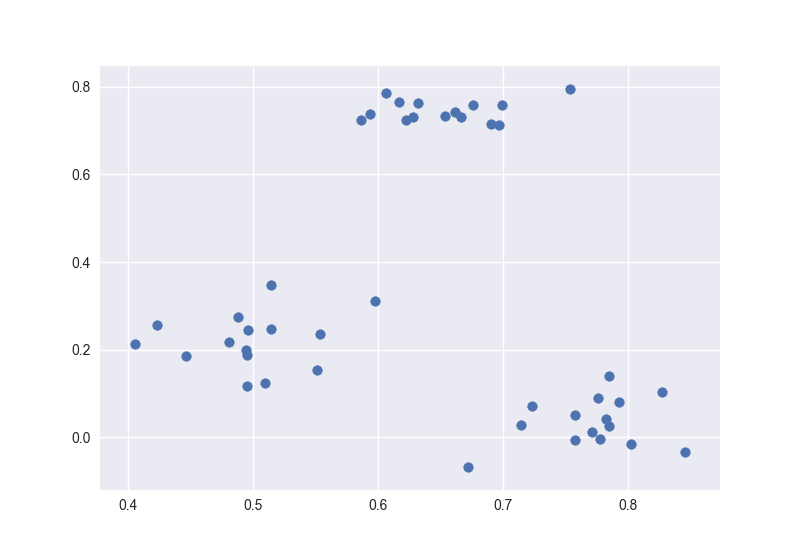

In [6]:
# plot the data proints
X = of.X
ax = plt.scatter(x=X[:, 0], y=X[:, 1])

In [7]:
print('a = {}'.format(of.a))
print('b = {}'.format(of.b))

a = [ 0.40569774 -0.06641667  0.40569774 -0.06641667  0.40569774 -0.06641667]
b = [ 0.84554749  0.79467683  0.84554749  0.79467683  0.84554749  0.79467683]


**Bounds are repeated for each centroid, that will be tuned by the heuristic.**

In [8]:
# some random evaluations
for i in range(10):
    x = of.generate_point()
    print('f({}) = {}'.format(x, of.evaluate(x)))

f([ 0.78194912  0.71860281  0.58602198  0.03709441  0.35065639  0.56319068]) = 1.5757117098259972
f([ 0.29972987  0.51233415  0.67346693  0.15919373  0.05047767  0.33781589]) = 3.771019226633744
f([ 0.10806377  0.17890281  0.8858271   0.36536497  0.21876935  0.75249617]) = 6.4964980944298425
f([ 0.10687958  0.74460324  0.46978529  0.59825567  0.14762019  0.18403482]) = 8.436064778545106
f([ 0.64507213  0.04862801  0.24861251  0.54240852  0.22677334  0.38141153]) = 4.187560378845203
f([ 0.92223279  0.92535687  0.56674992  0.53347088  0.01486002  0.97789926]) = 6.812173194286739
f([ 0.5730289   0.791757    0.56155736  0.87733524  0.58419583  0.70884983]) = 11.294668250484552
f([ 0.14853345  0.42845074  0.69389007  0.10461974  0.43960524  0.16620215]) = 5.716204583147944
f([ 0.50697863  0.81903586  0.09010673  0.80006875  0.56512635  0.58934771]) = 7.915603507292262
f([ 0.19810066  0.43611826  0.29590376  0.03755768  0.03068484  0.453105  ]) = 9.194794833445604


In [9]:
# we can get cluster labels (for a random solution)
labels = of.get_cluster_labels(x)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1]


In [10]:
# auxiliary routine
def visualize_solution(x, of):
    labels = of.get_cluster_labels(x)
    X = of.X
    ax = plt.scatter(x=X[:, 0], y=X[:, 1], c=labels)

<IPython.core.display.Javascript object>


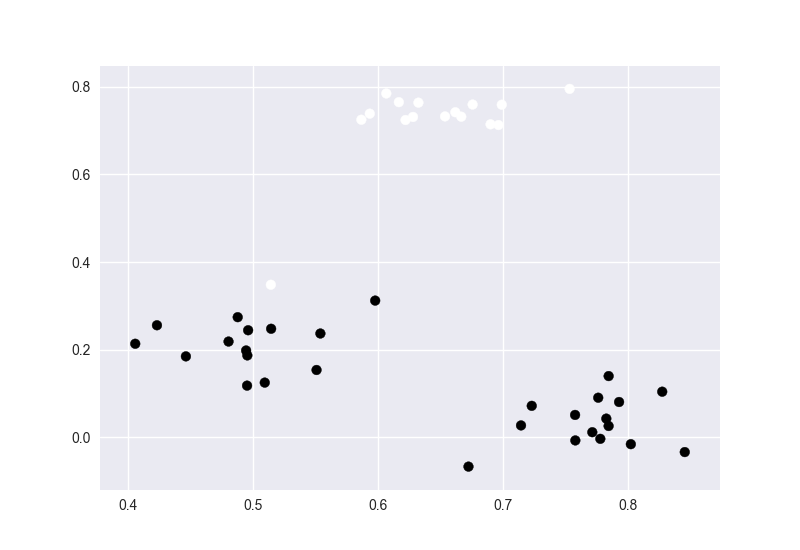

In [11]:
# visualization of a random solution
visualize_solution(x, of)

# Optimization demonstration

In [12]:
from heur_aux import MirrorCorrection, CauchyMutation
from heur_fsa import FastSimulatedAnnealing

In [13]:
heur = FastSimulatedAnnealing(of, maxeval=10000, T0=10, n0=10, alpha=2, 
                              mutation=CauchyMutation(r=0.1, correction=MirrorCorrection(of)))
res = heur.search()
print('x_best = {}'.format(res['best_x']))
print('y_best = {}'.format(res['best_y']))
print('neval = {}'.format(res['neval']))

x_best = [ 0.74645552  0.0499427   0.46357474  0.16920205  0.67805373  0.71820457]
y_best = 0.29138104832060957
neval = 304


<IPython.core.display.Javascript object>


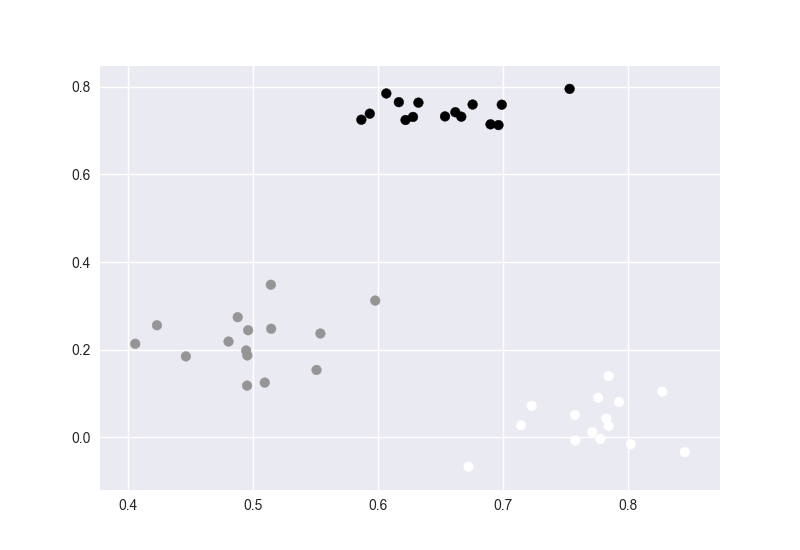

In [14]:
visualize_solution(res['best_x'], of)

## Excercises

* Improve the implementation of this objective function (especially the random solution generator)
* Tune heuristics for this objective function
* Tune this objective function, e.g. by penalization for smaller number of clusters than $h$ (and make sure you understand why this is possible)
* Compare heuristic approach to the original _k_-means